In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [4]:
confidences_all = load_pickle('../../data/label_studio/all_paddle_confidences.pkl')
offsets = load_pickle('../../data/label_studio/both_offsets.pkl')
labels = load_pickle('../../data/label_studio/both_labels.pkl')
preds = load_pickle('../../data/label_studio/both_paddle_predictions.pkl')

In [5]:
# because i only stored confidences for all orientations, we first need to retrieve the ones corresponding to the correct orientations

In [6]:
confidences = []
for idx, offset in enumerate(offsets):
    confidences += [confidences_all[4*idx + offset]]

Text(0.5, 1.0, 'paddle confidences')

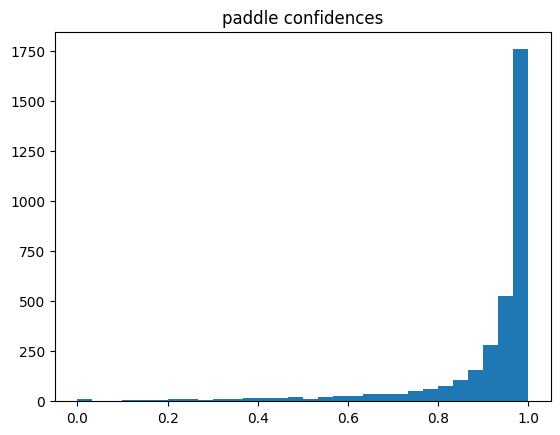

In [7]:
# investigate distribution of confidences

plt.hist(confidences, bins='rice')
plt.title('paddle confidences')

In [38]:
geq_x = np.arange(0.0, 1.0, 0.01)

In [39]:
confidences = np.asarray(confidences)

In [40]:
# compute levenshtein distance 

In [41]:
import sys
sys.path.append('../../')
from ocr_ensemble.evaluation import levenshtein as lev

In [42]:
levs = np.asarray([lev(gt, pred) for gt, pred in zip(labels, preds)])

In [67]:
means = []
stds = []
cnts = []
maxs = []
for x in geq_x:
    means += [np.mean(levs[confidences >= x])]
    stds += [np.std(levs[confidences >= x])]
    cnts += [np.sum(confidences >= x)]
    maxs += [np.max(levs[confidences >= x])]

means = np.asarray(means)
stds = np.asarray(stds)
cnts = np.asarray(cnts)
maxs = np.asarray(maxs)

In [68]:
def gaussian_confidence_plot(means, stds, cnts, geq_x):
    upper = means + 1.96*stds/np.sqrt(cnts)
    lower = means - 1.96*stds/np.sqrt(cnts)
    x = np.arange(len(means))
    plt.plot(x, means)
    plt.fill_between(x, lower, upper, color='blue', alpha=0.5)
    plt.plot(x, [1]*len(x), 'k--')
    plt.plot(x, [0.8]*len(x), 'k--')
    plt.plot(x, [0.6]*len(x), 'k--')
    plt.xticks(np.arange(0, len(geq_x), 5),  ['%.0f'%(100*b) for b in geq_x[::5]])
    plt.xlim(0, len(geq_x)-1)
    plt.ylim(0, upper.max())

In [74]:
def max_plot(maxs, geq_x):
    x = np.arange(len(means))
    plt.plot(x, maxs)
    #plt.plot(x, [1]*len(x), 'k--')
    #plt.plot(x, [0.8]*len(x), 'k--')
    #plt.plot(x, [0.6]*len(x), 'k--')
    plt.xticks(np.arange(0, len(geq_x), 5),  ['%.0f'%(100*b) for b in geq_x[::5]])
    plt.xlim(0, len(geq_x)-1)
    plt.ylim(0, maxs.max())

Text(0.5, 0, 'confidences >= x')

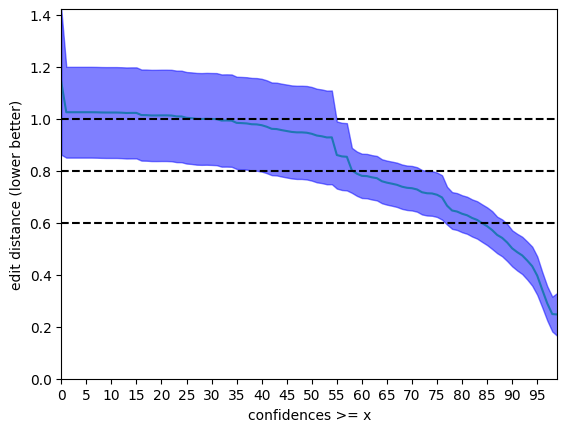

In [75]:
gaussian_confidence_plot(means, stds, cnts, geq_x)
plt.ylabel('edit distance (lower better)')
plt.xlabel('confidences >= x')

Text(0.5, 0, 'confidences >= x')

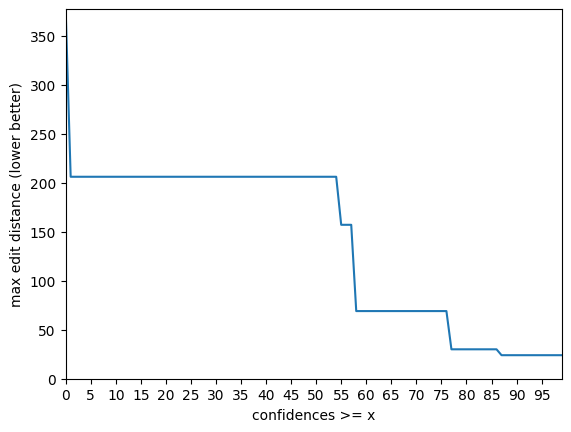

In [76]:
max_plot(maxs, geq_x)
plt.ylabel('max edit distance (lower better)')
plt.xlabel('confidences >= x')

(0.0, 70.0)

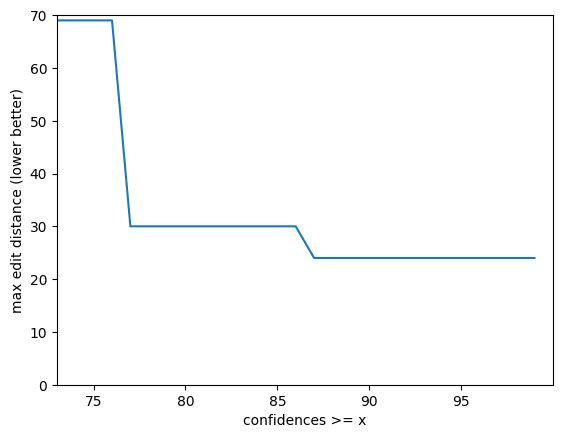

In [82]:
max_plot(maxs, geq_x)
plt.ylabel('max edit distance (lower better)')
plt.xlabel('confidences >= x')
plt.xlim(73, 100)
plt.ylim(0, 70)

In [56]:
upper = means + 1.96*stds/np.sqrt(cnts)

In [59]:
geq_x[upper <= 0.8]

array([0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99])

In [83]:
preds = np.asarray(preds)
labels = np.asarray(labels)

preds_keep = preds[confidences > 0.99]
labels_keep = labels[confidences > 0.99]

In [84]:
for _ in range(50):
    idx = np.random.randint(len(preds_keep))
    print('%s\n%s'%(labels_keep[idx], preds_keep[idx]))

FRIENDS
FRIENDS
BUTTER
BUTTER
Concept inspired by Lennart Dobravsky at Lufthansa Innovation Hub
Concept inspired by Lennart Dobravsky at Lufthansa Innovation Hub
$1,181
$1,181
10
10
GORDON'S GIN
GORDONS GIN
www.alamy.com
www.alamy.com
25%
25%
KEEP
KEEP
Nerves
Nerves
Master
MASTER
HARVICK
HARVICK
FINANCIAL GROUP
FINANCIAL GROUP
1
1
ENERGY!!
ENERGY!!
19
19
protect
protect
Rohinya
Rohinya
45694318
45694318
year...from
year...from
47.9%
47.9%
Coldie
Coldie
Sharing
Sharing
marcato
marcato
submit "Send"
submit "Send"
OF
OF
Difference
Difference
Driver Banquet Form - Ticket Price is $60
Driver Banquet Form - Ticket Price is $60
DENNY
DENNY
THEY
THEY
BEVERAGE
BEVERAGE
Rise
Rise
ENERGY!!
ENERGY!!
Bytham Sands and Gravels
Bytham Sands and Gravels
BAKING
BAKING
80%
80%
sage
Sage
ver1575
ver1575
HOME
HOME
ENTERTAINMENT
ENTERTAINMENT
groups and Answers)
groups and Answers)
in solids. [3m]
in solids. [3m]
THUNDERLORD
THUNDERLORD
Martin E. Levine, CPA
Martin E. Levine, CPA
101
101
CHISPA
CHISPA
$952


In [86]:
mask = confidences > 0.99
idx = np.argmax(levs[mask])
levs[mask][idx]

24.0

In [87]:
print(labels[mask][idx])
print(preds[mask][idx])

pure and potent ingredients
PURE AND POTENT INGREDIENTS
